# OCR
 

## Imports

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import re
from os.path import exists
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import string


import letter_detection_utils as ld_util
import preprocessing as pp
import ressources as rss
import modele as mdl
import rendering as rd
import metric_orthograph as mo
import matplotlib.pyplot as plt


# initialisation des variables globales
rss.init()



/Users/jpec/miniconda3/envs/work/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Pour recharger les libs pendant les devs
from importlib import reload 
reload(ld_util)
reload(pp)
reload(rss)
reload(mdl)
reload(rd)
reload(mo)

<module 'metric_orthograph' from '/Users/jpec/Prog/OCRpyMAN/notebooks/metric_orthograph.py'>

# Full model

In [12]:
# Loads models

text_detection_model = mdl.load_text_detection_model("text_detection/fine_tuning_final/weights")
text_reco_model = tf.keras.models.load_model("../pickle/tj_ctc_augmented_20epochs_LR-plateau", custom_objects={"CTCLoss": mdl.CTCLoss})


INFO:root:Using downloaded & verified file: /Users/jpec/.cache/doctr/models/db_resnet50-adcafc63.zip
2023-02-28 22:54:31.938 INFO    root: Using downloaded & verified file: /Users/jpec/.cache/doctr/models/db_resnet50-adcafc63.zip
INFO:root:Using downloaded & verified file: /Users/jpec/.cache/doctr/models/crnn_vgg16_bn-76b7f2c6.zip
2023-02-28 22:54:33.173 INFO    root: Using downloaded & verified file: /Users/jpec/.cache/doctr/models/crnn_vgg16_bn-76b7f2c6.zip


2/2 [==============================] - 1s 522ms/step


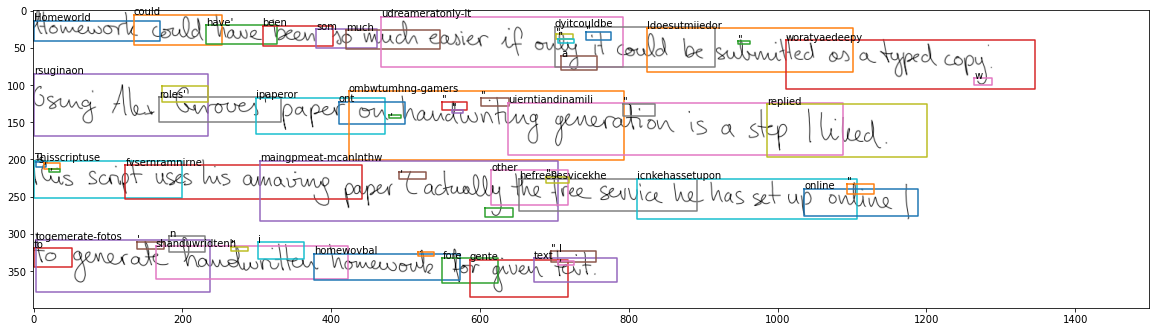

['Homeworld', 'could', "have'", 'been', 'som', 'much', 'udreameratonly-lt', 'dyitcouldbe', '"', '"', '"', 'ldoesutmiiedor', '"', 'woratyaedeepy', 'rsuginaon', 'a', 'w', "roles'", '', 'ipaperor', 'ont', 'ombwtumhng-gamers', ',', '"', '"', '"', 'uierntiandinamili', '".', 'replied', 'Thisscriptuse', "'s", ',', ',', 'fvsernramnirne', 'maingpmeat-mcanlnthw', ',', 'other', 'hefreesesvicekhe', '"n', 'icnkehassetupon', 'online', '".', '', 'to', 'togemerate-fotos', "'", 'shanduwridtenh', 'n', '"', 'i', 'homewovbal', '.', 'fore', 'gente', 'text', '".l', ',']


In [ ]:
# Uses both models, chained

form_img_path = 'D:/tmp/test6.png'
text = mdl.make_ocr(text_detection_model, text_reco_model, form_img_path, with_display=True)
print(text)

/Users/jpec/miniconda3/envs/work/lib/python3.8/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 0s 90ms/step


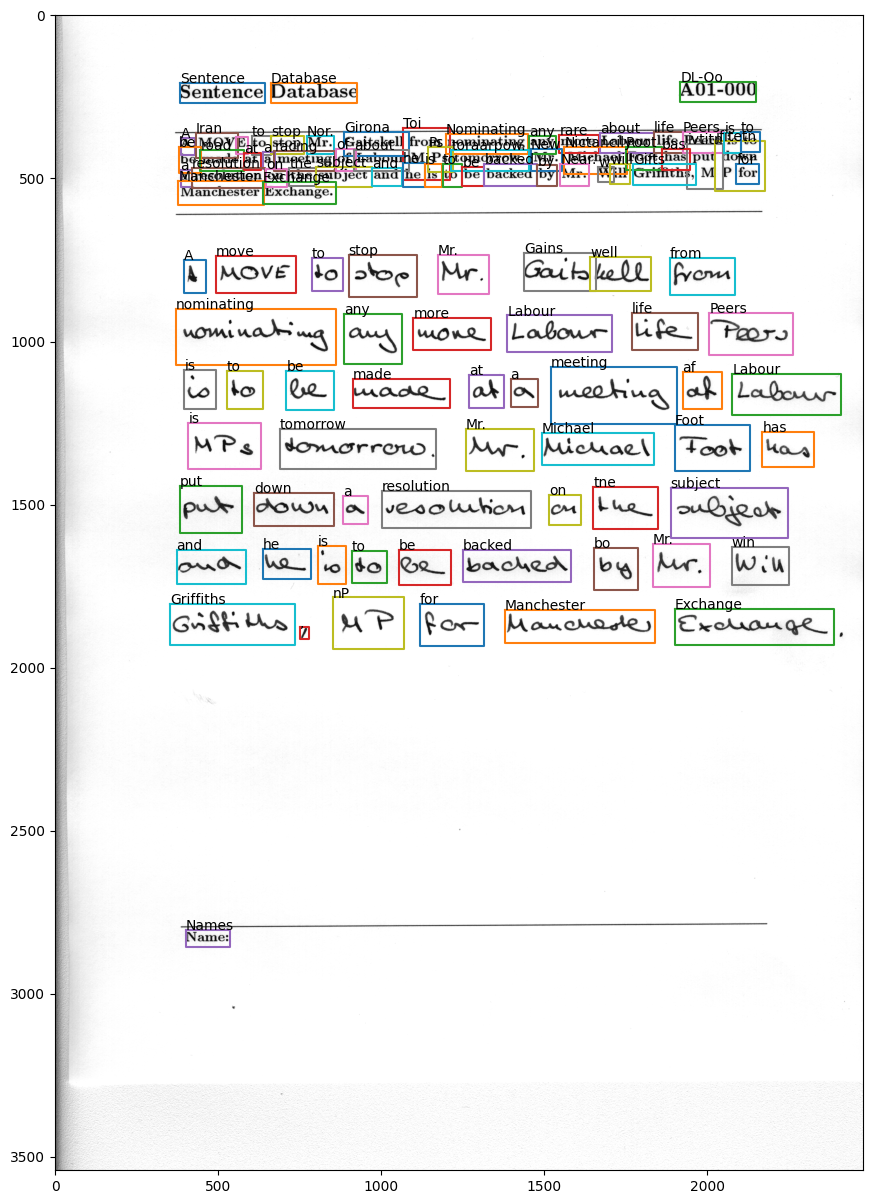

['Sentence', 'Database', 'DL-Oo', 'Toi', 'A', 'Iran', '', 'to', 'stop', 'Nor.', 'Girona', 'Nominating', 'any', 'rare', 'about', 'life', 'Peers', 'ivtitn', 'jfitetn', 'is', 'to', 'be', 'road', 'at', 'a', 'racing', 'of', 'about', 'Ps', 'toraarpow.', 'New', 'Nictancily', 'Root', 'bas', 'a', 'resolution', 'on', 'the', 'subject', 'and', 'he', 'is', 'to', 'be', 'backed', 'by', 'Near.', 'w', 'will', 'Gifts', 'for', 'Manchester', 'Exchange', 'move', 'to', 'stop', 'Mr.', 'Gains', 'well', 'from', 'A', 'nominating', 'any', 'more', 'Labour', 'life', 'Peers', 'is', 'to', 'be', 'meeting', 'af', 'Labour', 'made', 'at', 'a', 'is', 'tomorrow', 'Mr.', 'Michael', 'Foot', 'has', 'put', 'tne', 'subject', 'down', 'a', 'resolution', 'on', 'and', 'he', 'is', 'to', 'be', 'backed', 'bo', 'Mr.', 'win', 'nP', 'Griffiths', 'for', 'Manchester', 'Exchange', ',', 'Names']


In [10]:
form_img_path = '../data/formsA-D/a01-000u.png'
text = mdl.make_ocr(text_detection_model, text_reco_model, form_img_path, with_display=True)
print(text)

/Users/jpec/miniconda3/envs/work/lib/python3.8/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 0s 117ms/step


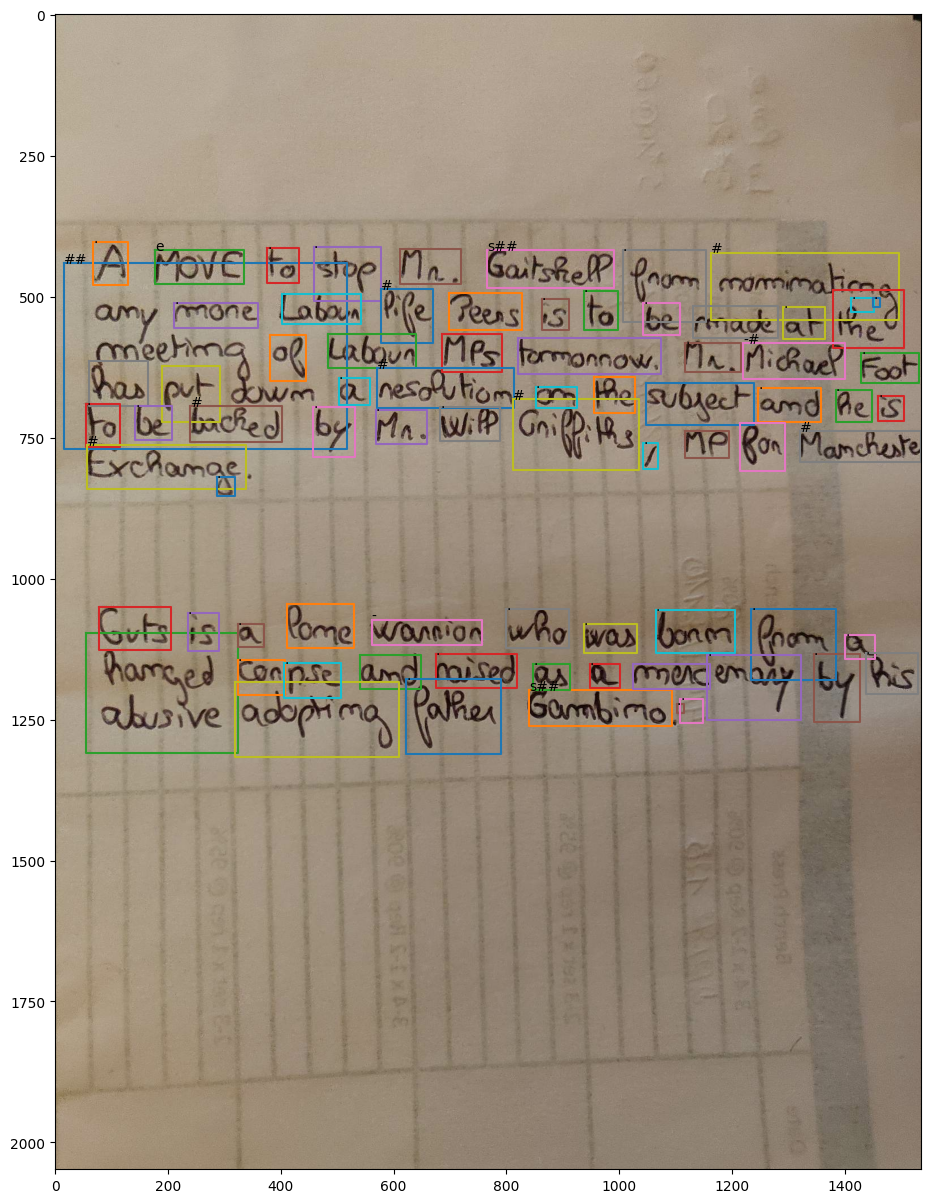

['##', '.', 'e', '.', '.', '', 's##', '.', '#', '', '#', '', '.', '', '.', '.', '.', '', '.', '.', '.', '', '', '', '', '.', '-#', '', '', '.', '#', '', '.', '.', '.', '#', '.', '.', '#', '.', '', '.', '.', '.', '.', '', '', '#', '#', '.', '.', '', '', '', '.', '.', '-', '.', '.', '.', '.', '.', '', '.', '.', '.', '.', '.', '', '.', '.', 's##', '.', '.', '', '.', '.']


In [13]:
text = mdl.make_ocr(
    text_detection_model, 
    text_reco_model, 
    'text_detection/custom_imgs/custom_writing.jpeg',
    with_display=True)
print(text)